# 1. Numpy

Numerical Python의 줄임말로, 파이썬 산술 계산의 주춧돌 같은 라이브러리며, 고속 배열 처리와 데이터 분석 알고리즘에 사용할 데이터 컨테이너의 역할을 한다.

### 차원에 따른 numbers
- scalar: number ex)3, -5, 0.3
- vector: list of numbers ex) [3,4,5] (can be in row or column of matrix)
- matrix: array of numbers ex) 1st row= [1,2,3], 2nd row= [4,5,6] (dataframe with row and column)
- Tensor: n-dimensional array. 0D tensor: scalar, 1D tensor: vector, 2D tensor: matrix
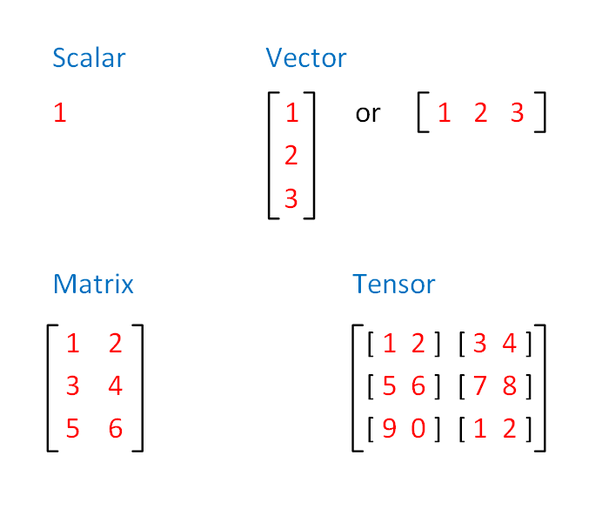

### data type
- 수치: 수치 종류 + 비트 ex)int8(부호가 있는 8비트 정수), unint16(부호가 없는 16비트 정수), float32(32비트 부동소수점)  
- 그 밖: bool(불리언: True or false), object(객체), string(문자열) 등이 있다.

In [42]:
#import
import numpy as np

## 1.1. NumPy ndarray: 다차원 배열 객체

### ndarray 데이터 생성
- array함수 이용: 순차적인 객체를 넘겨받아 넘겨받은 데이터가 있는 새로운 NumPy 배열 생성

In [12]:
#list로부터 변환
list= [6, 7.8, 9, 12]
arr1= np.array(list)
arr1

array([ 6. ,  7.8,  9. , 12. ])

In [13]:
#같은 길이를 가지는 여러 개의 list를 내포한 순차 데이터 역시 변환 가능
list2= [[6,7,8,9], [10,10,10,10]]
arr2= np.array(list2)
arr2

array([[ 6,  7,  8,  9],
       [10, 10, 10, 10]])

In [14]:
#위와 같은 경우 2차원 형태로 생성됨
arr2.shape

(2, 4)

In [16]:
#명시적으로 지정하지 않은 경우 np.array는 입력된 데이터로부터 자동적으로 적절한 자료형을 추론한다.
arr1.dtype

dtype('float64')

In [17]:
arr2.dtype

dtype('int32')

- 객체를 넘겨받지 않고, np.array에 채워질 원소를 통일하여 직접 지정하도록 해주는 함수: zeros (or zeros_like), ones (or ones_like) 함수 이용
    - _like: 주어진 배열과 동일한 shape과 dtype을 가지는 배열을 새로 생성

In [40]:
np.zeros(4)

array([0., 0., 0., 0.])

In [24]:
np.zeros_like(arr2)

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

In [39]:
# np.zeros vs np.empty: 0으로 초기화된 배열을 반환하지 않고 초기화되지 않은 'garbage'값으로 채워진 배열 반환
np.empty(4)

array([1.41234744e-311, 1.41243156e-311, 1.41243156e-311, 1.41243156e-311])

In [32]:
np.empty_like(arr2)

array([[-1825144000,         665, -1655398328,         665],
       [-1655397048,         665, -1655396152,         665]])

In [41]:
np.ones(4)

array([1., 1., 1., 1.])

In [25]:
np.ones_like(arr2)

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

### 유니버설 함수(ufunc)
하나 이상의 스칼라값을 받아서 하나 이상의 스칼라 결괏값을 반환하는 간단한 함수를 빠른 속도로 수해앟ㄹ 수 있는 vectorized wrapper 함수

- 원하는 shape의 numpy자료형을 랜덤한 숫자로 채우는 함수: random.randn(shape) 사용

In [9]:
#임의의 값을 2개의 row X 3개의 column의 형태로 생성
data= np.random.randn(2,3)

data.shape


(2, 3)

In [10]:
data

array([[-0.29758092, -1.03130701, -0.55098402],
       [ 0.94670059,  2.11725599, -0.85098637]])

- 연속된 숫자를 array의 원소로 할당하는 함수: arange() 사용

In [60]:
sequence= np.arange(10)
sequence

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 1.2. ndarray 자료형 변환
- ndarray의 astype 메서드로 배열의 dtype을 명시적으로 변환 가능하다.

In [44]:
arr= np.array([1,2,3,4,5])
arr.dtype

dtype('int32')

In [46]:
arr.astype(np.float64).dtype

dtype('float64')

In [49]:
arr= np.array([1.1,2.2,3.3,4.4,5.5])
arr.dtype

dtype('float64')

In [51]:
#부동소수점을 정수형 dtype으로 바꾸면 소수점 아래 자리는 버려진다.
arr_c= arr.astype(np.int32)
arr_c

array([1, 2, 3, 4, 5])

In [56]:
#숫자 형식의 문자열 역시 숫자로 변환할 수 있다.
numeric_strings= np.array(['1.25', '4.4', '6.7'], dtype=np.string_)
numeric_strings

array([b'1.25', b'4.4', b'6.7'], dtype='|S4')

In [57]:
numeric_strings.dtype #string 자료형 코드는 S

dtype('S4')

In [58]:
#문자열은 flaot64로 변환될 수 없어 에러가 출력된다.
numeric_strings.astype(float64)

NameError: name 'float64' is not defined

In [59]:
#그냥 float라고만 입력해도 자료형을 알맞은 dtype으로 바꿔준다.
numeric_strings.astype(float)

array([1.25, 4.4 , 6.7 ])

- astype(other_array.dytype): 다른 배열의 dtype속성을 그대로 가져와서 할당하는 것도 가능하다

In [62]:
int_array= np.arange(10)

arr= np.array([.22, .27, .357], dtype=np.float64)

int_array.astype(arr.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## 1.3. numpy 배열의 연산
array는 for 문을 작성하지 않고도 데이터를 일괄 처리할 수 있다= 벡터화.
### 같은 크기의 배열 간의 산술 연산은 배열의 각 원소 단위로 적용

In [65]:
data= np.random.randn(2,3)
data

array([[-0.08827014,  1.05833428, -0.43144802],
       [ 0.05688638,  0.36929495,  0.55753905]])

In [3]:
data + data

array([[-2.52576027, -0.3376889 ,  1.83087486],
       [-0.96850573, -0.62883162, -1.03201694]])

### 크기가 다른 배열 간의 연산은 broadcasting

- 스칼라 인자가 포함된 산술 연산의 경우 배열 내의 모든 원소에 지정된 산술이 적용된다.

In [2]:
data * 10

array([[-12.62880136,  -1.68844448,   9.15437429],
       [ -4.84252867,  -3.14415812,  -5.16008472]])

In [68]:
#array의 각 칼럼에서 칼럼별 평균값을 뺀 연산을 아래와 같이 수행 가능
demeaned= arr- arr.mean(0)
demeaned

array([-0.06233333, -0.01233333,  0.07466667])

- 브로드캐스팅 연산을 로우에 대해 적용한다면 브로드캐스팅 규칙을 잘 따라야 한다.  
브로드캐스팅 규칙: 이어지는 각 차원에 대해 축의 길이가 일치하거나 둘 중 하나의 길이가 1일 때 두 array는 브로드캐스팅 호환이다. 브로드캐스팅 호환인 두 array에서 브로드캐스팅은 누락되거나 길이가 1인 차원에 대해 수행된다.

In [73]:
data.shape

(2, 3)

In [72]:
data_rowmeans= data.mean(1)
data_rowmeans.shape

(2,)

In [76]:
data_rowmeans.reshape((2,1))
data_rowmeans

array([0.17953871, 0.32790679])

In [79]:
#data와 data_rowmeans에 대해 브로드캐스팅을 하면
#data_rowmeans와 같은 (4,1)shape의 array가 3번 더 반복되어 data의 각 칼럼마다 빼진다.
demeaned= data= data_rowmeans
demeaned

array([0.17953871, 0.32790679])

In [82]:
#3차원 배열일 경우는 아래와 같다.

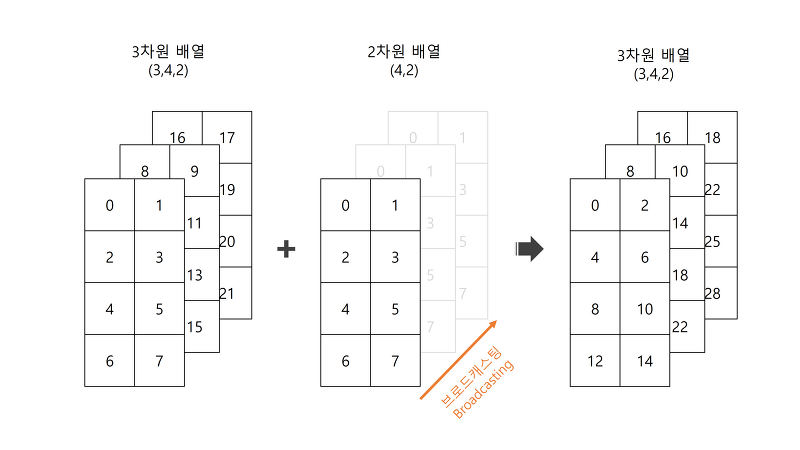

- 배열의 색인 값을 입력할 때도 브로드캐스팅 규칙 사용이 가능하다.

In [83]:
arr= np.zeros((4,3))
arr[:]=5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [85]:
arr2= np.array([1,2,3,4])
arr[:]= arr2[:, np.newaxis]
arr

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

In [90]:
arr[:2]= [[-1], [-2]]
arr

array([[-1., -1., -1.],
       [-2., -2., -2.],
       [ 3.,  3.,  3.],
       [ 4.,  4.,  4.]])

### 유니버설 함수(ufunc)를 이용한 연산

- 단항 유니버설 함수: 한 개의 인자를 취함

In [177]:
arr= np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [178]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ])

In [179]:
np.exp(arr) #e의 x제곱의 지수 계산

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [186]:
np.sign(arr) #부호

array([0, 1, 1, 1, 1])

    그 밖에:
    - abs, fabs: 절댓값
    - square: 제곱 값
    - log, log10, log2, log1p(로그(1+x))
    - ceil, floor, rint: 소숫점 내림 올림 반올림(정수 반환)
    - isnan: 각 원소가 nan(not a number)인지 아닌지 불리언 배열로 반환
    - isfinite, isinf : 각 원소가 유한한지 무한한지


- 이항 유니버설 함수: 2개의 인자를 취함

In [181]:
x= np.random.randn(5)
x

array([-0.84760861,  1.24808215, -0.07661469, -0.49185694,  0.5718764 ])

In [183]:
y= np.random.randn(5)
y

array([1.17610238, 0.07386175, 0.56188323, 1.65435482, 1.58587922])

In [188]:
np.add(x,y)

array([0.32849377, 1.3219439 , 0.48526854, 1.16249788, 2.15775563])

In [189]:
np.subtract(x,y)

array([-2.02371099,  1.17422041, -0.63849792, -2.14621175, -1.01400282])

In [184]:
np.maximum(x,y) #fmax는 nan값 무시

array([1.17610238, 1.24808215, 0.56188323, 1.65435482, 1.58587922])

In [185]:
np.minimum(x,y) #fmin은 nan값 무시

array([-0.84760861,  0.07386175, -0.07661469, -0.49185694,  0.5718764 ])

    그 밖에:
    - multiply:  두 배열의 원소끼리 곱한다.
    - divide, floor_divide:첫 번째 배열의 원소를 두 번째 배열의 원소로 나눈다. floor_divide는 몫만 취함.
    - power: 첫 번째 배열의 원소를 두 번째 배열의 원소만큼 제곱한다.

## 1.4. 색인과 슬라이싱

### 1차원 array는 list와 유사하게 동작

In [92]:
arr= np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
arr[5]

5

In [94]:
arr[5:8]

array([5, 6, 7])

- 위 braodcasting에서 보았듯이, 배열 조각에 스칼라값을 대입하면 해당 스칼라값이 선택 영역 전체로 브로드캐스팅된다.

In [95]:
arr[5:8]=12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

- 슬라이스된 배열을 다른 변수로 저장한 후 값을 변경해도 원래 배열 역시 변경된다.

In [98]:
s_arr= arr[5:8]
s_arr

array([12, 12, 12])

In [99]:
s_arr[:]= [5,6,7]
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 2차원 이상 array는 좀 더 많은 옵션이 있다.
1) 색인

- 2차원 배열에서 일차적인 색인은 1차원 배열이다.

In [101]:
arr2d= np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [102]:
arr2d[2]

array([7, 8, 9])

- 따라서 2차원 배열에서 개별 스칼라값은 콤마로 구분하여 색인하거나 재귀적으로 색인한다.

In [103]:
arr2d[2][0]

7

In [104]:
arr2d[2,0]

7

- 마찬가지로, 3차원 배열에서 일차적인 색인은 2차원 배열이다.

In [107]:
arr3d= np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [108]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

- 3차원 배열에서 1차원 배열은 두 번의 재귀적 색인 혹은 한 개의 콤마로, 개별 스칼라값은 세 번의 재귀적 색인 혹은 두 개의 콤마로 색인한다.  
축은 n차원일 때 axis0은 n차원, axis1은 n-1차원 순으로 거꾸로 할당된다고 생각하면 된다. 예를 들어 2차원일 때는 axis0은 1차원, axis1은 2차원이었지만 3차원일 때는 axis0이 3차원, axis1이 2차원, axis2r가 1차원이 된다. []를 기준으로 본다면 가장 바깥에 있는 []부터 점차 안으로 들어간다고 생각하면 된다.

In [109]:
arr3d[0][1]

array([4, 5, 6])

In [110]:
arr3d[0,1]

array([4, 5, 6])

In [111]:
arr3d[0][1][2]

6

In [112]:
arr3d[0,1,2]

6

2) 슬라이싱  
인덱싱과 마찬가지로 축을 기준으로 슬라이싱된다. 

In [116]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [115]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [117]:
arr2d[:2, 1]

array([2, 5])

In [118]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [121]:
arr3d[0,1,:2]

array([4, 5])

In [122]:
arr3d[:,:,1:]

array([[[ 2,  3],
        [ 5,  6]],

       [[ 8,  9],
        [11, 12]]])

### 불리언값으로 선택하여 인덱싱: 슬라이싱 혹은 값 할당
True인 값만 선택된다.

In [136]:
names=np.array(["Alice", "Bob", "Cathy", "Dorothy", "Bob"])
data=np.random.randn(5,5)

In [137]:
data

array([[-0.98882929,  1.17781288,  0.48585063,  0.13046031, -0.41195388],
       [ 0.60563618,  0.16431029, -1.44130968,  0.48027757, -1.13593534],
       [-0.3864315 , -0.97804035, -0.23674727,  0.7043268 ,  2.57154592],
       [-0.41770311,  0.56310411,  1.2763983 , -1.32836497,  0.4887665 ],
       [-0.36088683, -0.22774146,  0.34518264,  1.22003888, -0.31820973]])

In [140]:
#배열에 대한 비교 연산도 벡터화되어, names를 "Bob"문자열과 비교한 결과를 불리언 배열로 반혼
names == "Bob"

array([False,  True, False, False,  True])

In [141]:
#이를 data의 색인으로 사용하면 슬라이싱된다.
data[names == "Bob"]

array([[ 0.60563618,  0.16431029, -1.44130968,  0.48027757, -1.13593534],
       [-0.36088683, -0.22774146,  0.34518264,  1.22003888, -0.31820973]])

In [142]:
data[:,names == "Bob"]

array([[ 0.        ,  0.        ],
       [ 0.16431029, -1.13593534],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.22774146, -0.31820973]])

In [143]:
data[names != "Bob"]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [144]:
data[(names=="Bob")|(names=="Cathy")]

array([[ 0.60563618,  0.16431029, -1.44130968,  0.48027757, -1.13593534],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.36088683, -0.22774146,  0.34518264,  1.22003888, -0.31820973]])

In [145]:
data[names != "Bob"]=0
data

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.60563618,  0.16431029, -1.44130968,  0.48027757, -1.13593534],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.36088683, -0.22774146,  0.34518264,  1.22003888, -0.31820973]])

- 변형하고 싶은 데이터에 조건을 걸어 boolean을 생성해도 역시 값 할당 및 인덱싱이 가능하다.

In [150]:
data=np.random.randn(5,5)
data

array([[ 2.19114292,  0.57266086,  0.81729614,  0.17113378, -0.39470838],
       [-0.48114474, -1.57513335, -0.05791164, -0.29173026, -0.42291382],
       [-0.43417952,  0.25662529,  0.1161769 , -1.7853475 , -0.20992207],
       [ 0.10205934,  1.40410873,  1.80120761, -1.73712418, -0.43441396],
       [-1.06240893,  0.29261533,  2.08494236,  0.8004383 ,  0.91457083]])

In [151]:
data[data<0]

array([-0.39470838, -0.48114474, -1.57513335, -0.05791164, -0.29173026,
       -0.42291382, -0.43417952, -1.7853475 , -0.20992207, -1.73712418,
       -0.43441396, -1.06240893])

In [152]:
data[data<0]=0
data

array([[2.19114292, 0.57266086, 0.81729614, 0.17113378, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.25662529, 0.1161769 , 0.        , 0.        ],
       [0.10205934, 1.40410873, 1.80120761, 0.        , 0.        ],
       [0.        , 0.29261533, 2.08494236, 0.8004383 , 0.91457083]])

### fancy indexing (permutation)

In [154]:
arr= np.empty((7,4))

for i in range(7):
    arr[i]= i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.]])

원하는 순서가 명시된 ndarray나 list 를 index로 넘긴다.

In [162]:
arr[[3,4,5,1]]

array([[3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [1., 1., 1., 1.]])

In [ ]:
배열의 차원과 상관없이, fancy indexing의 결과는 항상 1차원이다.

In [166]:
arr[[3,4],[0,0]]

array([3., 4.])

### 배열 전치, 축 바꾸기

- 2차원 배열

In [170]:
arr= np.empty((7,4))

for i in range(7):
    arr[i]= i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.]])

In [171]:
arr_t=arr.T
arr_t

array([[0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.],
       [0., 1., 2., 3., 4., 5., 6.]])

- 3차원 이상의 다차원 배열: 튜플로 축 번호를 받아서 치환한다.

In [172]:
arr= np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [176]:
arr.transpose((1,2,0)) #shape= [2,4,2]

array([[[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11]],

       [[ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]]])

## 1.5. 배열지향 프로그래밍
반복문을 작성하지 않고 간결한 배열 연산을 사용해 많은 종류의 데이터 처리 작업이 가능함

### 1.5.1. 배열 연산으로 조건절 표현하기


고전적인 파이썬 조건절로 cond가 True일 때는 xarr값, False일 때는 yarr값 취하기

In [195]:
xarr= np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr= np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond= np.array([True, False, True, False, True])

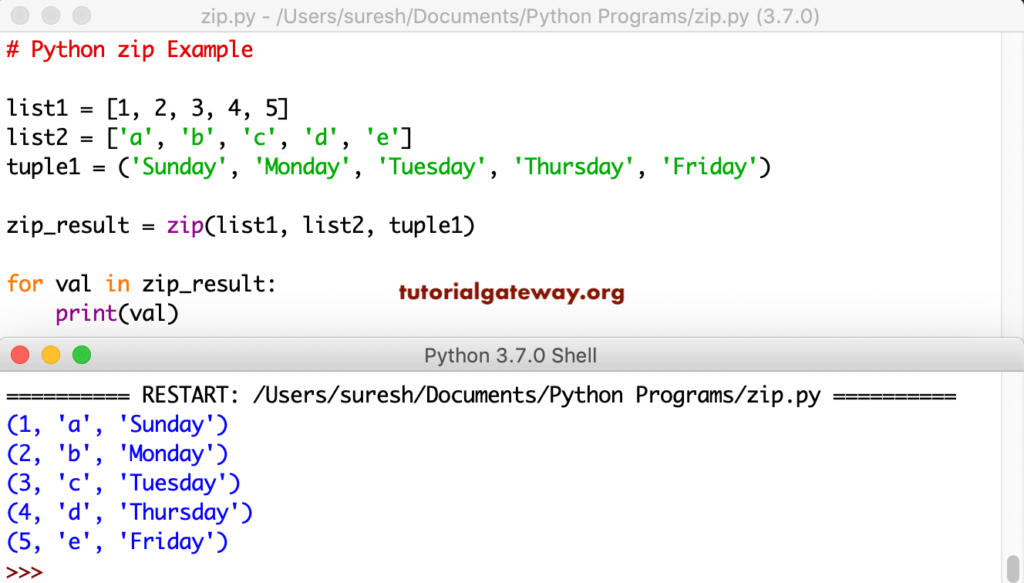

In [196]:
result= [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 2.4, 1.5]

위 방법은 큰 배열을 빠르게 처리할 수 없고, 다차원 배열에서 사용할 수 없다. 이러한 기능을 numpy.where함수를 이용해 구현할 수 있다.
- numpy.where함수: x if 조건 else y와 같은 삼항식의 벡터화된 버전.  
: np.where(조건, 만족할 경우 대체값, 만족하지 않을 경우 대체값)

In [198]:
result= np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 2.4, 1.5])

np.where의 두 번째와 세 번째 인자는 배열이 아니어도 상관없고, 스칼라값이어도 동작한다.

In [199]:
arr=np.random.randn(4,4)
arr

array([[ 0.23693759, -0.2050216 ,  1.58971571,  0.66640204],
       [ 0.81267731,  1.3595856 ,  0.27296829, -1.287878  ],
       [-0.57196262,  2.1601014 ,  0.19925264, -0.84916985],
       [-1.81629025,  1.19078462,  0.51692818, -1.22881632]])

In [200]:
arr>0

array([[ True, False,  True,  True],
       [ True,  True,  True, False],
       [False,  True,  True, False],
       [False,  True,  True, False]])

In [201]:
np.where(arr>0,2,-2)

array([[ 2, -2,  2,  2],
       [ 2,  2,  2, -2],
       [-2,  2,  2, -2],
       [-2,  2,  2, -2]])

np.where의 두 번째와 세 번째 값으로 스칼라와 배열을 조합할 수도 있다.

In [202]:
np.where(arr<0,2,arr)

array([[0.23693759, 2.        , 1.58971571, 0.66640204],
       [0.81267731, 1.3595856 , 0.27296829, 2.        ],
       [2.        , 2.1601014 , 0.19925264, 2.        ],
       [2.        , 1.19078462, 0.51692818, 2.        ]])

### 1.5.2. 수학 메서드와 통계 메서드
배열 전체 혹은 배열에서 한 축에 해당하는 자료에 대해 통계를 계산하는 수학 함수 또한 배열 메서드로 사용할 수 있다.

In [203]:
arr= np.random.randn(5,4)
arr

array([[-0.37624715,  0.94386072,  3.33267918,  1.07950669],
       [-0.71056642, -1.39016217,  1.50797269, -1.04278719],
       [ 0.4406797 , -0.26239533, -0.75028023, -0.47375348],
       [-1.22507396, -0.17669879, -0.21214563,  1.20794364],
       [-0.2707649 ,  0.09865003,  0.0320305 ,  0.06679941]])

mean이나 sum같은 함수는 axis를 인자로 받지 않을 경우 모든 원소들에 대해 계산하여 스칼라값을 출력한다.

In [204]:
arr.mean()

0.0909623656113611

In [205]:
np.mean(arr)

0.0909623656113611

In [208]:
arr.sum()

1.8192473122272221

In [207]:
np.sum(arr)

1.8192473122272221

mean이나 sum같은 함수는 선택적으로 axis인자를 받아서 해당 axis에 대한 통계를 계산하고 한 치수 낮은 배열을 반환한다.

In [209]:
arr.mean(axis=1)

array([ 1.24494986, -0.40888577, -0.26143734, -0.10149368, -0.01832124])

In [210]:
arr.sum(axis=0) 

array([-2.14197273, -0.78674555,  3.91025651,  0.83770908])

### 1.5.3. 불리언 배열을 위한 메서드
이전 메서드의 불리언값을 1(True) 혹은 0(False)로 강제할 수 있다. 따라서 sum 메서드를 실행하면 불리언 배열에서 True인 원소의 개수를 셀 수 있다.

In [213]:
arr= np.random.randn(100)
(arr>0).sum()

46

any와 all 메서드는 불리언 배열에 특히 유용하다.
- any: 하나 이상의 값이 True인지 검사
- all: 모든 값이 True인지 검사

In [214]:
bools= np.array([False, False, True, True, True])
print(bools.any(), bools.all())

True False


### 1.5.4. 정렬
리스트처럼 Numpy array역시 array_name.sort()메서드를 이용해서 정렬할 수 있다

In [216]:
arr= np.random.randn(7)
arr

array([-0.08499055, -0.36483315,  0.9522154 ,  1.10740501, -0.13239382,
       -0.86142399, -1.58251827])

In [218]:
arr.sort()
arr

array([-1.58251827, -0.86142399, -0.36483315, -0.13239382, -0.08499055,
        0.9522154 ,  1.10740501])

다차원 array의 경우, sort()메서에 넣은 축의 값에 따라 1차원 부분을 정렬할 수 있다.

In [219]:
arr= np.random.randn(3,4)
arr

array([[-1.26196944,  0.21604942,  1.16616101, -1.61386811],
       [ 0.12578539, -0.13624395,  0.93221308,  1.41619329],
       [-0.51343191, -1.84846016, -2.59525721,  0.46921678]])

In [221]:
arr.sort(1)
arr

array([[-1.61386811, -1.26196944,  0.21604942,  1.16616101],
       [-0.13624395,  0.12578539,  0.93221308,  1.41619329],
       [-2.59525721, -1.84846016, -0.51343191,  0.46921678]])

정렬과 관련된 여러 다른 데이터 처리는 pandas에서.

### 1.5.5. 집합 관련 함수

가장 많이 사용하는 집합 관련 함수 중 하나는 배열 내에서 중복된 원소를 제거하고 남은 원소를 정렬하여 반환하는 np.unique(array_name)이다.

In [222]:
names= np.array(["Allison", "Chloe", "Tina", "Jenny", "Tina", "Joe", "Joe"])
np.unique(names)
#순수 파이썬의 sorted(set(names))와 같다

array(['Allison', 'Chloe', 'Jenny', 'Joe', 'Tina'], dtype='<U7')

np.in1d(array1,array2)함수는 두 개의 배열을 인자로 받아서 첫 번째 배열의 원소가 두 번째 배열의 원소를 포함하는지 나타내는 불리언 배열을 출력한다.

In [223]:
values= np.array([0,1,2,3,4,5])
np.in1d(values, np.array([5,6,7]))

array([False, False, False, False, False,  True])

np.union1d(array1, array2)는 두 배열의 합집합을 반환한다.

In [224]:
np.union1d(values, np.array([5,6,7]))

array([0, 1, 2, 3, 4, 5, 6, 7])

그 밖의 집합 관련 함수는 아래와 같다:
- intersect1d(array1, array2): 두 배열에 공통적으로 존재하는 원소를 정렬하여 반환한다.
- setdiff1d(array1, array2): 두 배열의 차집합을 반환한다.
- setxor1d(array1, array2): 한 배열에는 포함되지만 두 배열 모두에는 포함되지 않는 원소들의 집합인 대칭차집합을 반환.

## 1.6. 난수 생성

앞서 소개했던 유니버설 함수 중 하나인 numpy.random을 좀 더 살펴보자.  
numpy.random은 난수 생성기의 시드값에 따라 정해진 난수를 알고리즘으로 생겅하는 유사 난수를 리턴한다.  
NumPy 난수 생성기의 시드값은 np.random.seed를 이용해서 변경할 수 있다.

1) 전역 난수 시드값 설정: numpy.random에서 제공하는 데이터를 생성하는 함수들은 모두 아래와 같이 정해진, 혹은 default 전역 난수 시드값을 사용한다.

In [229]:
np.random.seed(1234)

2) 다른 난수 생성기로부터 격리된 난수 생성기를 만들 수 있다.

In [231]:
r= np.random.RandomState(1234)

r.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 2. Pandas

구조화된 데이터나 표 형식의 데이터를 빠르고 쉽고 표현적으로 다루도록 설계된 고수준의 자료구조와 함수를 제공한다. pandas의 많은 기능은 자료 프로그래밍 언어 R의 data.frame객체에서 따온 것으로, R 언어를 사용하는 사용자에게는 이해하기 비교적 쉬울 것이다.

In [232]:
import pandas as pd

## 2.1. 자료 구조

### Series
일련의 객체를 담을 수 있는 1차원 배열 같은 자료구조로, 어떤 NumPy자료형이라도 담을 수 있다.  
Series객체는 왼쪽에 색인(index)을, 오른쪽에 해당 색인의 값을 보여준다.
- 색인을 지정하지 않는 경우 기본 색인 (정수 0부터 N-1)
- 색인을 지정한 경우 지정 색인

In [233]:
obj= pd.Series([4,7,6,3])
obj

0    4
1    7
2    6
3    3
dtype: int64

In [234]:
obj2= pd.Series([4,7,6,3], index=['a','b','c','d'])
obj2

a    4
b    7
c    6
d    3
dtype: int64

In [253]:
#혹은 직접 대입하여 변경할 수도 있다.
obj.index= ['a','b','c','d']
obj

a    4
b    7
c    6
d    3
dtype: int64

NumPy 배열과 비교하자면, 값을 선택할 때 색인으로 지정한 라벨의 배열을 사용할 수 있다.  
불리언 배열과 산술을 수행할 때 역시 색인 라벨의 배열을 사용할 수 있다.

In [238]:
obj2[['a', 'c']]

a    4
c    6
dtype: int64

In [239]:
obj2[obj2>4]

b    7
c    6
dtype: int64

Series를 이해하는 다른 방법은 고정 길이의 정렬된 dictionary라고 생각하는 것이다.  
: 파이썬의 사전형을 인자로 받아야 하는 많은 함수에서 사전형을 대체해서 사용할 수 있다.

In [240]:
'b' in obj2

True

In [241]:
'f' in obj2

False

dictionary 객체로부터 series 객체를 생성할 수 있다.

In [243]:
sdata= {'New York': 3500, 'Austin': 1000, 'Boston': 5000, 'San Fransisco': 3000 }
obj3= pd.Series(sdata)
obj3

New York         3500
Austin           1000
Boston           5000
San Fransisco    3000
dtype: int64

In [246]:
#index 순서 직접 지정
obj4= pd.Series(sdata, index= ['Austin', 'Boston', 'San Fransisco', 'New York'])
obj4

Austin           1000
Boston           5000
San Fransisco    3000
New York         3500
dtype: int64

In [247]:
obj4= pd.Series(sdata, index= ['Austin', 'Boston', 'San Fransisco', 'San Diego'])
obj4 #누락된 값은 NaN으로 표시됨

Austin           1000.0
Boston           5000.0
San Fransisco    3000.0
San Diego           NaN
dtype: float64

pd.isnull(object_name) (or object_name.isnull()) 과 pd.notnull() (or object_name.notnull())  
: null값을 찾은 결과를 불리언 형태로 출력

In [248]:
pd.isnull(obj4)

Austin           False
Boston           False
San Fransisco    False
San Diego         True
dtype: bool

In [249]:
pd.notnull(obj4)

Austin            True
Boston            True
San Fransisco     True
San Diego        False
dtype: bool

Series끼리 산술 연산 시, 색인과 라벨로 자동 정렬된다.

In [250]:
obj3+obj4

Austin            2000.0
Boston           10000.0
New York             NaN
San Diego            NaN
San Fransisco     6000.0
dtype: float64

Series의 index와 object모두 name속성이 있다: pandas의 핵심 기능과 밀접한 관련이 있다.

In [254]:
obj4.name= 'population'
obj4.index.name= 'city'

obj4

city
Austin           1000.0
Boston           5000.0
San Fransisco    3000.0
San Diego           NaN
Name: population, dtype: float64

### Dataframe
표와 같은 스프레드시트 형식의 자료 구조, 여러 개의 칼럼이 있다는 것이 Series와의 차이점.
데이터프레임은 row와 column에 대한 색인(index)를 가지고 있는데, 이를 색인의 모양이 같은 series 객체를 담고 있는 파이썬 사전으로 이해하면 편하다. 

DataFrame객체는 다양한 방법으로 생성할 수 있지만 가장 흔하게 사용되는 방법은 
- 같은 길이의 리스트에 담긴 사전을 이용
- Numpy배열을 이용하는 것이다.

In [259]:
data= {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2003, 2004, 2005],
        'pop': [1.5, 1.7, 3.6, 4.0, 5.2, 2.0]}
frame= pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2003,4.0
4,Nevada,2004,5.2
5,Nevada,2005,2.0


Series와 마찬가지로 column별 원하는 순서대로 데이터프레임을 생성할 수 있고, index이름을 지정할 수 있으며,  
딕셔너리에 없는 값을 넘기면 원소로 NaN이 출력된다.

In [260]:
pd.DataFrame(data, columns= ['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2003,Nevada,4.0
4,2004,Nevada,5.2
5,2005,Nevada,2.0


In [262]:
data2= pd.DataFrame(data, columns= ['year', 'date', 'state', 'pop'],
            index= ['one','two','three','four','five','six'])
data2

,year,date,state,pop
one,2000,NaN,Ohio,1.5
two,2001,NaN,Ohio,1.7
three,2002,NaN,Ohio,3.6
four,2003,NaN,Nevada,4.0
five,2004,NaN,Nevada,5.2
six,2005,NaN,Nevada,2.0


**column과 row에 접근하기**
- column은 Series처럼 사전 형식의 표기법으로 접근하거나, 속성 형식으로 접근할 수 있다.
- row는  
    -row의 index이름을 통해 접근할 때는 data.loc['이름']  
    -index순서를 통해 접근할 때는 data.iloc[n] (n번째 에 있는 row 호출)

In [265]:
#column by name
data2['year']

one      2000
two      2001
three    2002
four     2003
five     2004
six      2005
Name: year, dtype: int64

In [266]:
#column by 속성
data2.year

one      2000
two      2001
three    2002
four     2003
five     2004
six      2005
Name: year, dtype: int64

In [264]:
#row by name
data2.loc['six']

year       2005
date        NaN
state    Nevada
pop           2
Name: six, dtype: object

In [268]:
#row by 위치적 순서
data2.iloc[5]

year       2005
date        NaN
state    Nevada
pop           2
Name: six, dtype: object

**Column에 대입하기:**
- 대입하려는 값의 길이가 DataFrame의 길이(총 행의 수)와 동일해야 한다.
- Series를 대입할 시 index에 따라 값이 대입되며 존재하지 않는 index에 대해서는 NaN이 대입됨

In [269]:
data2['debt']= 5
data2

,year,date,state,pop,debt
one,2000,NaN,Ohio,1.5,5
two,2001,NaN,Ohio,1.7,5
three,2002,NaN,Ohio,3.6,5
four,2003,NaN,Nevada,4.0,5
five,2004,NaN,Nevada,5.2,5
six,2005,NaN,Nevada,2.0,5


In [273]:
data2['debt']= np.arange(6)
data2

,year,date,state,pop,debt
one,2000,NaN,Ohio,1.5,0
two,2001,NaN,Ohio,1.7,1
three,2002,NaN,Ohio,3.6,2
four,2003,NaN,Nevada,4.0,3
five,2004,NaN,Nevada,5.2,4
six,2005,NaN,Nevada,2.0,5


In [274]:
val= pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'six'])
data2['debt']=val
data2

,year,date,state,pop,debt
one,2000,NaN,Ohio,1.5,NaN
two,2001,NaN,Ohio,1.7,-1.2
three,2002,NaN,Ohio,3.6,NaN
four,2003,NaN,Nevada,4.0,-1.5
five,2004,NaN,Nevada,5.2,NaN
six,2005,NaN,Nevada,2.0,-1.7


### 색인 객체
pandas의 색인 객체는 표 형식의 데이터에서 각 로우와 칼럼에 대한 이름과 다른 메타데이터(name 등)을 저장하는 객체.  
Series나 DataFrame을 생성할 때 사용되지만, 그러한 배열은 객체에 색인으로 변환 저장되어 obj.index로 호출할 수 있다.

In [275]:
data2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [277]:
data2.index[2:]

Index(['three', 'four', 'five', 'six'], dtype='object')

In [279]:
#색인 객체는 변경이 불가능
data2.index[1]= 'One'

TypeError: Index does not support mutable operations

Index자료형은 자료구조 사이에서도 안전하게 공유될 수 있어, 한 데이터프레임의 인덱스를 다른 데이터프레임을 만들 때에도 사용할 수 있다.

In [281]:
labels= pd.Index(data2.index[:3])
labels

Index(['one', 'two', 'three'], dtype='object')

In [282]:
data3= pd.Series([1, -2, 3], index=labels)
data3

one      1
two     -2
three    3
dtype: int64

## 2.2. 외부 파일로부터 데이터 불러오기

In [ ]:
#자료형에 따라 다양한 read함수를 사용한다.

read_csv() # csv (text)
read_excel() #excel
read_json() #json

### 2.1.1. json
- JSON= JavaScript Object Notation: 웹브라우저와 다른 어플리케이션이 http 요청으로 데이터를 보낼 때 널리 사용하는 표준 파일 중 하나, csv와 같은 표 형식의 텍스트보다 좀 더 유연한 데이터 형식  
- 기본 자료형: 객체(dictionary), array(list), string, number boolean, null. 이때 객체의 key는 반드시 string이어야  

1) JSON 문자열을 파이썬 형태로 변환하기 위해서는 json.loads를 사용

In [297]:
obj= """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"Siblings": [{"name": "Scott", "age": 30, "pets": ["Zuko", "happy"]},
{"name": "Gabby", "age": 32, "pets": "Sixes"}]
}
"""

In [298]:
import json
result= json.loads(obj) 
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'Siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zuko', 'happy']},
  {'name': 'Gabby', 'age': 32, 'pets': 'Sixes'}]}

json 데이터를 다른 자료구조로 변환하여 분석하는 것은 각자의 몫

In [301]:
#DataFrame
siblings= pd.DataFrame(result["Siblings"], columns=["name", "age", "pets"])
siblings

,name,age,pets
0,Scott,30,"[Zuko, happy]"
1,Gabby,32,Sixes


2) 외부 json 파일에서 불러올 경우 read_json().  
pd.read_json은 자동으로 JSON 데이터셋을 Series나 DataFrame으로 변환할 수 있다.

### 2.1.2. csv

In [347]:
lonely_3to4= pd.read_csv("C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\3~4_lonely_subreddit.csv",)
lonely_3to4

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair
0,fpmscg,hi,is anyone willing to just talk to me? i really...,https://www.reddit.com/r/lonely/comments/fpmsc...,0033070302,1,2020-03-27 09:07:29,5,/r/lonely/comments/fpmscg/hi/,NaN
1,fpmt1w,"If you are lonely at the age 23, hit me up",and lets change that together!,https://www.reddit.com/r/lonely/comments/fpmt1...,Boredom51,1,2020-03-27 09:08:45,4,/r/lonely/comments/fpmt1w/if_you_are_lonely_at...,NaN
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN
3,fpn8yx,I'm desperate,"I have applied to some universities in the US,...",https://www.reddit.com/r/lonely/comments/fpn8y...,ravenanana,1,2020-03-27 09:36:37,0,/r/lonely/comments/fpn8yx/im_desperate/,NaN
4,fpnajw,Really wish I had someone to call. It'd be nic...,NaN,https://www.reddit.com/r/lonely/comments/fpnaj...,wiatbenjamin,1,2020-03-27 09:39:17,1,/r/lonely/comments/fpnajw/really_wish_i_had_so...,NaN
...,...,...,...,...,...,...,...,...,...,...
1303,fvbxqh,I can barely close my eyes without seeing thei...,"I loved them so much and they just, left me ag...",https://www.reddit.com/r/lonely/comments/fvbxq...,TheFearlessFrog,1,2020-04-05 19:46:41,5,/r/lonely/comments/fvbxqh/i_can_barely_close_m...,NaN
1304,fvc9se,"I can relate to being lonely, so hope this helps",https://imgur.com/a/WfooXlF\n\n\nI’m going sti...,https://www.reddit.com/r/lonely/comments/fvc9s...,SEXWORKA,1,2020-04-05 20:17:41,0,/r/lonely/comments/fvc9se/i_can_relate_to_bein...,NaN
1305,fvce8u,My first ever poem,I don't know If this is the right place to pos...,https://www.reddit.com/r/lonely/comments/fvce8...,parlejibiscoot,1,2020-04-05 20:29:28,0,/r/lonely/comments/fvce8u/my_first_ever_poem/,NaN
1306,fvcg9b,Life goes on,It had been 3 years since I saw the only perso...,https://www.reddit.com/r/lonely/comments/fvcg9...,rx9ue,1,2020-04-05 20:34:57,0,/r/lonely/comments/fvcg9b/life_goes_on/,NaN


큰 파일을 다루기 전, pandas의 출력 설정을 수정하여 최대 n개의 데이터만 출력하게 할 수 있다.

In [421]:
pd.options.display.max_rows= 5

In [422]:
lonely_3to4= pd.read_csv("C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\3~4_lonely_subreddit.csv",)
lonely_3to4

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair
0,fpmscg,hi,is anyone willing to just talk to me? i really...,https://www.reddit.com/r/lonely/comments/fpmsc...,0033070302,1,2020-03-27 09:07:29,5,/r/lonely/comments/fpmscg/hi/,NaN
1,fpmt1w,"If you are lonely at the age 23, hit me up",and lets change that together!,https://www.reddit.com/r/lonely/comments/fpmt1...,Boredom51,1,2020-03-27 09:08:45,4,/r/lonely/comments/fpmt1w/if_you_are_lonely_at...,NaN
...,...,...,...,...,...,...,...,...,...,...
1306,fvcg9b,Life goes on,It had been 3 years since I saw the only perso...,https://www.reddit.com/r/lonely/comments/fvcg9...,rx9ue,1,2020-04-05 20:34:57,0,/r/lonely/comments/fvcg9b/life_goes_on/,NaN
1307,fvclij,Anyone?,Who else feels like everyone will abandon them...,https://www.reddit.com/r/lonely/comments/fvcli...,Tayler_Vengenz,1,2020-04-05 20:48:31,4,/r/lonely/comments/fvclij/anyone/,NaN


파일 전체를 읽는 대신 처음 몇 줄만 읽어오고 싶다면 nrows,  
파일을 여러 조각으로 나누어 읽고 싶다면 chunksize옵션으로 row의 개수를 주면 된다.

In [423]:
pd.read_csv("C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\3~4_lonely_subreddit.csv", nrows=5)

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair
0,fpmscg,hi,is anyone willing to just talk to me? i really...,https://www.reddit.com/r/lonely/comments/fpmsc...,0033070302,1,2020-03-27 09:07:29,5,/r/lonely/comments/fpmscg/hi/,NaN
1,fpmt1w,"If you are lonely at the age 23, hit me up",and lets change that together!,https://www.reddit.com/r/lonely/comments/fpmt1...,Boredom51,1,2020-03-27 09:08:45,4,/r/lonely/comments/fpmt1w/if_you_are_lonely_at...,NaN
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN
3,fpn8yx,I'm desperate,"I have applied to some universities in the US,...",https://www.reddit.com/r/lonely/comments/fpn8y...,ravenanana,1,2020-03-27 09:36:37,0,/r/lonely/comments/fpn8yx/im_desperate/,NaN
4,fpnajw,Really wish I had someone to call. It'd be nic...,NaN,https://www.reddit.com/r/lonely/comments/fpnaj...,wiatbenjamin,1,2020-03-27 09:39:17,1,/r/lonely/comments/fpnajw/really_wish_i_had_so...,NaN


In [424]:
chunker= pd.read_csv("C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\3~4_lonely_subreddit.csv", chunksize= 24)
chunker

In [425]:
#반환된 textparser객체로 cunksize에 따라 분리된 파일들 순회 가능
tot=pd.Series([])
for piece in chunker:
    tot= tot.add(piece['Body'].value_counts(), fill_value=0)

tot= tot.sort_values(ascending=False)

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [426]:
tot[7:12]

I have not cried in about a year, this morning was rough for me. I had a dream where this girl I knew from a long time ago was running her fingers up and down my arm and I woke up and felt awful. Touch and words of affirmation are my love languege. Something I don't get from my family who have been cruel and something I can't expect at my job as a cook. It's been a really long time since I've gotten a hug.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

데이터를 텍스트 형식으로 기록하기 위해서 data.to_sv('')를 쓰면 쉼표로 구분된 형식으로 파일에 쓸 수 있다.  
다른 구분자는 sep argument로 지정 시 사용 가능하다.  
비어 있는 문자열 역시 원하는 값으로 지정 가능하다.  
이 기능은 DataFrame processing 후 마지막에 저장 시 살펴볼 것.

## 2.3. Crawled data로 pandas 핵심 기능 파악하기

In [427]:
pd.options.display.max_rows= 20

### 2.3.1. row나 column 삭제하기
1) Index로 삭제

In [339]:
data2

,year,date,state,pop,debt
one,2000,NaN,Ohio,1.5,NaN
two,2001,NaN,Ohio,1.7,-1.2
three,2002,NaN,Ohio,3.6,NaN
four,2003,NaN,Nevada,4.0,-1.5
five,2004,NaN,Nevada,5.2,NaN
six,2005,NaN,Nevada,2.0,-1.7


In [343]:
data2_r= data2.drop("six")
data2_r

,year,date,state,pop,debt
one,2000,NaN,Ohio,1.5,NaN
two,2001,NaN,Ohio,1.7,-1.2
three,2002,NaN,Ohio,3.6,NaN
four,2003,NaN,Nevada,4.0,-1.5
five,2004,NaN,Nevada,5.2,NaN


In [344]:
data2_r= data2.drop("year", axis=1) #혹은 axis='columns'
data2_r

,date,state,pop,debt
one,NaN,Ohio,1.5,NaN
two,NaN,Ohio,1.7,-1.2
three,NaN,Ohio,3.6,NaN
four,NaN,Nevada,4.0,-1.5
five,NaN,Nevada,5.2,NaN
six,NaN,Nevada,2.0,-1.7


2) 조건을 만족할 시 삭제

In [352]:
len(lonely_3to4)

1308

In [353]:
idx_deleted = lonely_3to4[lonely_3to4['Body']=="[deleted]"].index
lonely_3to4 = lonely_3to4.drop(idx_deleted)

len(lonely_3to4)

1294

### 2.3.2 색인하기, 선택하기, 거르기
1) data["column"], data[[list]는 Dataframe에서 column을 가져온다.

In [354]:
lonely_3to4['Title']

0                                                      hi
1              If you are lonely at the age 23, hit me up
2                                  Trying to make friends
3                                           I'm desperate
4       Really wish I had someone to call. It'd be nic...
                              ...                        
1303    I can barely close my eyes without seeing thei...
1304     I can relate to being lonely, so hope this helps
1305                                   My first ever poem
1306                                         Life goes on
1307                                              Anyone?
Name: Title, Length: 1294, dtype: object

In [356]:
lonely_3to4[['Title', 'Body']]

,Title,Body
0,hi,is anyone willing to just talk to me? i really...
1,"If you are lonely at the age 23, hit me up",and lets change that together!
2,Trying to make friends,"Hi everyone , hope you're all doing well with ..."
3,I'm desperate,"I have applied to some universities in the US,..."
4,Really wish I had someone to call. It'd be nic...,NaN
...,...,...
1303,I can barely close my eyes without seeing thei...,"I loved them so much and they just, left me ag..."
1304,"I can relate to being lonely, so hope this helps",https://imgur.com/a/WfooXlF\n\n\nI’m going sti...
1305,My first ever poem,I don't know If this is the right place to pos...
1306,Life goes on,It had been 3 years since I saw the only perso...


2) data[[a:b]]형태의 리스트 슬라이싱은 row를 가져온다. a,b는 숫자와 라벨 이름 모두 가능하다. 

In [366]:
lonely_3to4[:5]

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
0,fpmscg,hi,is anyone willing to just talk to me? i really...,https://www.reddit.com/r/lonely/comments/fpmsc...,0033070302,1,2020-03-27 09:07:29,5,/r/lonely/comments/fpmscg/hi/,NaN,24
1,fpmt1w,"If you are lonely at the age 23, hit me up",and lets change that together!,https://www.reddit.com/r/lonely/comments/fpmt1...,Boredom51,1,2020-03-27 09:08:45,4,/r/lonely/comments/fpmt1w/if_you_are_lonely_at...,NaN,5
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259
3,fpn8yx,I'm desperate,"I have applied to some universities in the US,...",https://www.reddit.com/r/lonely/comments/fpn8y...,ravenanana,1,2020-03-27 09:36:37,0,/r/lonely/comments/fpn8yx/im_desperate/,NaN,148
4,fpnajw,Really wish I had someone to call. It'd be nic...,NaN,https://www.reddit.com/r/lonely/comments/fpnaj...,wiatbenjamin,1,2020-03-27 09:39:17,1,/r/lonely/comments/fpnajw/really_wish_i_had_so...,NaN,0


3) boolean 배열로도 row를 선택할 수 있다.

In [362]:
#Body의 글자 수를 세어서 새로운 column에 추가하기
lonely_3to4['Body_wordcounts']= lonely_3to4.Body.apply(lambda x: len(str(x).split(' ')))

#Body의 값이 NaN일 경우에도 wordcount가 1이 되는 문제.
#문제를 해결하기 위해 "Body" column의 특정 row의 원소가 NaN인 경우 해당 row의 "Body_wordcounts"값을 0으로 할당
for i in lonely_3to4.index:
    if pd.isnull(lonely_3to4.loc[i,"Body"]) == True:
        lonely_3to4.loc[i,"Body_wordcounts"] = 0

In [367]:
lonely_3to4[:5]

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
0,fpmscg,hi,is anyone willing to just talk to me? i really...,https://www.reddit.com/r/lonely/comments/fpmsc...,0033070302,1,2020-03-27 09:07:29,5,/r/lonely/comments/fpmscg/hi/,NaN,24
1,fpmt1w,"If you are lonely at the age 23, hit me up",and lets change that together!,https://www.reddit.com/r/lonely/comments/fpmt1...,Boredom51,1,2020-03-27 09:08:45,4,/r/lonely/comments/fpmt1w/if_you_are_lonely_at...,NaN,5
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259
3,fpn8yx,I'm desperate,"I have applied to some universities in the US,...",https://www.reddit.com/r/lonely/comments/fpn8y...,ravenanana,1,2020-03-27 09:36:37,0,/r/lonely/comments/fpn8yx/im_desperate/,NaN,148
4,fpnajw,Really wish I had someone to call. It'd be nic...,NaN,https://www.reddit.com/r/lonely/comments/fpnaj...,wiatbenjamin,1,2020-03-27 09:39:17,1,/r/lonely/comments/fpnajw/really_wish_i_had_so...,NaN,0


In [371]:
lonely_3to4[lonely_3to4['Body_wordcounts']>200]

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259
9,fpnz2k,I’ve been that one weird/“sped” kid that every...,I’m in high school and I’ve moved around a bit...,https://www.reddit.com/r/lonely/comments/fpnz2...,Soul_Absorber,1,2020-03-27 10:23:22,0,/r/lonely/comments/fpnz2k/ive_been_that_one_we...,NaN,224
10,fpo0bb,I'm so done.,I've had enough. I've felt like this for way t...,https://www.reddit.com/r/lonely/comments/fpo0b...,TA_done,1,2020-03-27 10:25:50,2,/r/lonely/comments/fpo0bb/im_so_done/,NaN,953
16,fpphmt,21[M4F] Just Want some love and attention,Hey everyone how y'all doing? I'm Ash. I'm a 2...,https://www.reddit.com/r/lonely/comments/fpphm...,ashhawk98,1,2020-03-27 12:04:58,0,/r/lonely/comments/fpphmt/21m4f_just_want_some...,NaN,259
17,fppi2w,Alone yet again,I don't know what I am doing with my life anym...,https://www.reddit.com/r/lonely/comments/fppi2...,chaom1,1,2020-03-27 12:05:48,0,/r/lonely/comments/fppi2w/alone_yet_again/,NaN,208
...,...,...,...,...,...,...,...,...,...,...,...
1290,fva0a4,I feel really broken and want someone to talk ...,\nI'm 26. ive never had sex. Ive only been in ...,https://www.reddit.com/r/lonely/comments/fva0a...,Lonelyconversation1,1,2020-04-05 16:36:39,6,/r/lonely/comments/fva0a4/i_feel_really_broken...,NaN,499
1293,fva4sw,Severely losing motivation again,I don’t know what it is but I am struggling to...,https://www.reddit.com/r/lonely/comments/fva4s...,Late-Homework,1,2020-04-05 16:48:48,0,/r/lonely/comments/fva4sw/severely_losing_moti...,NaN,586
1295,fvaoyq,recovery is lonely. i miss him a lot. venting,"tw: csa, abuse\n\ni was in an abusive relation...",https://www.reddit.com/r/lonely/comments/fvaoy...,lonelycandle1,1,2020-04-05 17:43:43,6,/r/lonely/comments/fvaoyq/recovery_is_lonely_i...,NaN,1313
1302,fvblpj,Idk it’s 5AM and I’m stressed,Hi I’m 17f and a hs senior. At the moment I’m ...,https://www.reddit.com/r/lonely/comments/fvblp...,Kimberly_tgre,1,2020-04-05 19:14:19,3,/r/lonely/comments/fvblpj/idk_its_5am_and_im_s...,NaN,236


4) loc과 iloc으로 row와 column 동시에 선택하기  
: 축 이름을 선택할 때는 loc을, 정수 색인으로 선택할 때는 iloc을 사용한다.

data.loc["row", "column"]형태 혹은 data.loc["row"]["column"]: row의 인덱스가 숫자일 경우 "row"자리에 숫자

In [379]:
lonely_3to4.loc[2:7,["Body"]]

,Body
2,"Hi everyone , hope you're all doing well with ..."
3,"I have applied to some universities in the US,..."
4,NaN
5,"I just want to end it, I want to so badly, I’m..."
6,"I tried making friends, and got some by helpin..."
7,Just wanted to share that with some people :)


In [381]:
lonely_3to4.loc[2:7]["Body"]

2    Hi everyone , hope you're all doing well with ...
3    I have applied to some universities in the US,...
4                                                  NaN
5    I just want to end it, I want to so badly, I’m...
6    I tried making friends, and got some by helpin...
7        Just wanted to share that with some people :)
Name: Body, dtype: object

data.iloc[row인덱스값,column인덱스값], data.iloc[row인덱스값][column이름]모두 가능.  
인덱스값으로 슬라이싱할 경우 리스트 슬라이싱처럼 마지막 값은 포함되지 않고 슬라이싱된다.

In [380]:
lonely_3to4.iloc[2:7,2]

2    Hi everyone , hope you're all doing well with ...
3    I have applied to some universities in the US,...
4                                                  NaN
5    I just want to end it, I want to so badly, I’m...
6    I tried making friends, and got some by helpin...
Name: Body, dtype: object

In [387]:
#lonely_3to4.iloc[2:7][2] #error
lonely_3to4.iloc[2:7]["Body"]

2    Hi everyone , hope you're all doing well with ...
3    I have applied to some universities in the US,...
4                                                  NaN
5    I just want to end it, I want to so badly, I’m...
6    I tried making friends, and got some by helpin...
Name: Body, dtype: object

In [389]:
lonely_3to4.iloc[:30][lonely_3to4.Body_wordcounts>200]

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259
9,fpnz2k,I’ve been that one weird/“sped” kid that every...,I’m in high school and I’ve moved around a bit...,https://www.reddit.com/r/lonely/comments/fpnz2...,Soul_Absorber,1,2020-03-27 10:23:22,0,/r/lonely/comments/fpnz2k/ive_been_that_one_we...,NaN,224
10,fpo0bb,I'm so done.,I've had enough. I've felt like this for way t...,https://www.reddit.com/r/lonely/comments/fpo0b...,TA_done,1,2020-03-27 10:25:50,2,/r/lonely/comments/fpo0bb/im_so_done/,NaN,953
16,fpphmt,21[M4F] Just Want some love and attention,Hey everyone how y'all doing? I'm Ash. I'm a 2...,https://www.reddit.com/r/lonely/comments/fpphm...,ashhawk98,1,2020-03-27 12:04:58,0,/r/lonely/comments/fpphmt/21m4f_just_want_some...,NaN,259
17,fppi2w,Alone yet again,I don't know what I am doing with my life anym...,https://www.reddit.com/r/lonely/comments/fppi2...,chaom1,1,2020-03-27 12:05:48,0,/r/lonely/comments/fppi2w/alone_yet_again/,NaN,208
20,fppphk,"Build a wall, why dontcha?","So, I'm a Canadian, living in Canada, in my ho...",https://www.reddit.com/r/lonely/comments/fppph...,DOOKIEFOOKIE,1,2020-03-27 12:20:43,0,/r/lonely/comments/fppphk/build_a_wall_why_don...,NaN,369
21,fppxub,Invisible Essay,Just a random essay I wrote after watching Inv...,https://www.reddit.com/r/lonely/comments/fppxu...,Loyalfrost,1,2020-03-27 12:37:47,1,/r/lonely/comments/fppxub/invisible_essay/,NaN,429
22,fppzxn,Hi! Lonely here,I’m sorry about my lack of grammar I suck at t...,https://www.reddit.com/r/lonely/comments/fppzx...,lafemur,1,2020-03-27 12:41:43,0,/r/lonely/comments/fppzxn/hi_lonely_here/,NaN,241
26,fpqd5z,"27 [M4F] - Looking for someone, who prefers re...",Hey! I'm at such a point in my life where I ha...,https://www.reddit.com/r/lonely/comments/fpqd5...,hamartiated,1,2020-03-27 13:08:24,0,/r/lonely/comments/fpqd5z/27_m4f_looking_for_s...,NaN,690


**5) df.at vs df.loc & df. iat vs df.iloc**  
https://hippocampus-garden.com/pandas_loc/
- at과 iat은 scalar value (값 한 개)만 가져올 수 있다.
- df.loc, df.iloc은 multiple value (값 한 개 이상)을 가져올 수 있다    


- at, loc은 label을 기반으로 값을 가져오고,   
- iat, iloc은 interger position을 기반으로 값을 가져온다.

In [393]:
d=lonely_3to4.iloc[:30][lonely_3to4.Body_wordcounts>200]

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [399]:
#d.at[2,9][Body] #error
d.loc[[2,9]]["Body"]

2    Hi everyone , hope you're all doing well with ...
9    I’m in high school and I’ve moved around a bit...
Name: Body, dtype: object

In [400]:
d.at[2,"Body"]

"Hi everyone , hope you're all doing well with the quarentine. I'm a 16 yo spanish student trying to get rid of his social anxiety , I'm just sick of it and I've decided that I need to break off the shell , I just have such a hard time at school I barely have anyone to talk to and most times during lunch I just hide in the bathroom and eat my food there because I'm scared of engaging a conversation with other people , I have really good grades so I'm often called to go to the broad , and when that happens... I just lose it and my hands starts quivering and sweating like hell, I can feel like people make fun of me behind my back and that really gets me down sometimes I have only one friend at school.So I've decided that it's enough , I have to make a change in my life and stop being so socially awkward , I know that if I don't do something about it, it will affect me in the future one of my dad's friends offered me a job at a restaurant he owns and I really need the money and the labora

In [401]:
d.iat[2, 2]

'I\'ve had enough. I\'ve felt like this for way too long.\n\n\nGonna cut to the chase and jump back to September 2017, when I started a new high school for Year 10 (UK education system). I was 14 going 15, and had a fresh start along with everyone else, since they were taking Year 10 and above on board. Previously I hadn\'t really had a friendship group to hang with, so when I found people there I was so happy. I finally had people I could hang with. I finally had people I could open up to, be myself to, chill with. I was invited to outings. I had classmates. I had pals that would actually check up on me. I loved it.\n\n\nAround February to March, 2018: someone in the group introduces this guy, from this point on I\'ll call him \'M\'. I had talked to M a few times, but not enough to actually know him. We all thought he was a little strange at first, but gave him a chance. So, he sat with us, and became part of the group. Normal, right?\n\n...right?\n\n\nSomewhere around late-May to ear

### 2.3.3 재색인
원래 DataFrame에서 row를 추가하거나 삭제하는 등의 변형이 생기면 row에도 변형이 필요하다.
reindex vs reset_index https://www.programmersought.com/article/28614945229/  
1) reindex: 입력한 색인의 순서에 따라 df나 series 객체의 순서를 바꾸어 새로 생성. row와 column모두 가능

In [403]:
d.reindex([26,22,21,20,17,16,10,9,2])

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
26,fpqd5z,"27 [M4F] - Looking for someone, who prefers re...",Hey! I'm at such a point in my life where I ha...,https://www.reddit.com/r/lonely/comments/fpqd5...,hamartiated,1,2020-03-27 13:08:24,0,/r/lonely/comments/fpqd5z/27_m4f_looking_for_s...,NaN,690
22,fppzxn,Hi! Lonely here,I’m sorry about my lack of grammar I suck at t...,https://www.reddit.com/r/lonely/comments/fppzx...,lafemur,1,2020-03-27 12:41:43,0,/r/lonely/comments/fppzxn/hi_lonely_here/,NaN,241
21,fppxub,Invisible Essay,Just a random essay I wrote after watching Inv...,https://www.reddit.com/r/lonely/comments/fppxu...,Loyalfrost,1,2020-03-27 12:37:47,1,/r/lonely/comments/fppxub/invisible_essay/,NaN,429
20,fppphk,"Build a wall, why dontcha?","So, I'm a Canadian, living in Canada, in my ho...",https://www.reddit.com/r/lonely/comments/fppph...,DOOKIEFOOKIE,1,2020-03-27 12:20:43,0,/r/lonely/comments/fppphk/build_a_wall_why_don...,NaN,369
17,fppi2w,Alone yet again,I don't know what I am doing with my life anym...,https://www.reddit.com/r/lonely/comments/fppi2...,chaom1,1,2020-03-27 12:05:48,0,/r/lonely/comments/fppi2w/alone_yet_again/,NaN,208
16,fpphmt,21[M4F] Just Want some love and attention,Hey everyone how y'all doing? I'm Ash. I'm a 2...,https://www.reddit.com/r/lonely/comments/fpphm...,ashhawk98,1,2020-03-27 12:04:58,0,/r/lonely/comments/fpphmt/21m4f_just_want_some...,NaN,259
10,fpo0bb,I'm so done.,I've had enough. I've felt like this for way t...,https://www.reddit.com/r/lonely/comments/fpo0b...,TA_done,1,2020-03-27 10:25:50,2,/r/lonely/comments/fpo0bb/im_so_done/,NaN,953
9,fpnz2k,I’ve been that one weird/“sped” kid that every...,I’m in high school and I’ve moved around a bit...,https://www.reddit.com/r/lonely/comments/fpnz2...,Soul_Absorber,1,2020-03-27 10:23:22,0,/r/lonely/comments/fpnz2k/ive_been_that_one_we...,NaN,224
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259


In [406]:
#존재하지 않는 색인값에는 NaN 채워 출력
d.reindex([222,22,21,20,17,16,10,9,2])

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,fppzxn,Hi! Lonely here,I’m sorry about my lack of grammar I suck at t...,https://www.reddit.com/r/lonely/comments/fppzx...,lafemur,1.0,2020-03-27 12:41:43,0.0,/r/lonely/comments/fppzxn/hi_lonely_here/,NaN,241.0
21,fppxub,Invisible Essay,Just a random essay I wrote after watching Inv...,https://www.reddit.com/r/lonely/comments/fppxu...,Loyalfrost,1.0,2020-03-27 12:37:47,1.0,/r/lonely/comments/fppxub/invisible_essay/,NaN,429.0
20,fppphk,"Build a wall, why dontcha?","So, I'm a Canadian, living in Canada, in my ho...",https://www.reddit.com/r/lonely/comments/fppph...,DOOKIEFOOKIE,1.0,2020-03-27 12:20:43,0.0,/r/lonely/comments/fppphk/build_a_wall_why_don...,NaN,369.0
17,fppi2w,Alone yet again,I don't know what I am doing with my life anym...,https://www.reddit.com/r/lonely/comments/fppi2...,chaom1,1.0,2020-03-27 12:05:48,0.0,/r/lonely/comments/fppi2w/alone_yet_again/,NaN,208.0
16,fpphmt,21[M4F] Just Want some love and attention,Hey everyone how y'all doing? I'm Ash. I'm a 2...,https://www.reddit.com/r/lonely/comments/fpphm...,ashhawk98,1.0,2020-03-27 12:04:58,0.0,/r/lonely/comments/fpphmt/21m4f_just_want_some...,NaN,259.0
10,fpo0bb,I'm so done.,I've had enough. I've felt like this for way t...,https://www.reddit.com/r/lonely/comments/fpo0b...,TA_done,1.0,2020-03-27 10:25:50,2.0,/r/lonely/comments/fpo0bb/im_so_done/,NaN,953.0
9,fpnz2k,I’ve been that one weird/“sped” kid that every...,I’m in high school and I’ve moved around a bit...,https://www.reddit.com/r/lonely/comments/fpnz2...,Soul_Absorber,1.0,2020-03-27 10:23:22,0.0,/r/lonely/comments/fpnz2k/ive_been_that_one_we...,NaN,224.0
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1.0,2020-03-27 09:15:03,0.0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259.0


In [411]:
#존재하지 않는 색인값에 채울 값을 직접 명시할 수 있음
d.reindex([222,22,21,20,17,16,10,9,2], fill_value=0)

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
222,0,0,0,0,0,0,0,0,0,0.0,0
22,fppzxn,Hi! Lonely here,I’m sorry about my lack of grammar I suck at t...,https://www.reddit.com/r/lonely/comments/fppzx...,lafemur,1,2020-03-27 12:41:43,0,/r/lonely/comments/fppzxn/hi_lonely_here/,NaN,241
21,fppxub,Invisible Essay,Just a random essay I wrote after watching Inv...,https://www.reddit.com/r/lonely/comments/fppxu...,Loyalfrost,1,2020-03-27 12:37:47,1,/r/lonely/comments/fppxub/invisible_essay/,NaN,429
20,fppphk,"Build a wall, why dontcha?","So, I'm a Canadian, living in Canada, in my ho...",https://www.reddit.com/r/lonely/comments/fppph...,DOOKIEFOOKIE,1,2020-03-27 12:20:43,0,/r/lonely/comments/fppphk/build_a_wall_why_don...,NaN,369
17,fppi2w,Alone yet again,I don't know what I am doing with my life anym...,https://www.reddit.com/r/lonely/comments/fppi2...,chaom1,1,2020-03-27 12:05:48,0,/r/lonely/comments/fppi2w/alone_yet_again/,NaN,208
16,fpphmt,21[M4F] Just Want some love and attention,Hey everyone how y'all doing? I'm Ash. I'm a 2...,https://www.reddit.com/r/lonely/comments/fpphm...,ashhawk98,1,2020-03-27 12:04:58,0,/r/lonely/comments/fpphmt/21m4f_just_want_some...,NaN,259
10,fpo0bb,I'm so done.,I've had enough. I've felt like this for way t...,https://www.reddit.com/r/lonely/comments/fpo0b...,TA_done,1,2020-03-27 10:25:50,2,/r/lonely/comments/fpo0bb/im_so_done/,NaN,953
9,fpnz2k,I’ve been that one weird/“sped” kid that every...,I’m in high school and I’ve moved around a bit...,https://www.reddit.com/r/lonely/comments/fpnz2...,Soul_Absorber,1,2020-03-27 10:23:22,0,/r/lonely/comments/fpnz2k/ive_been_that_one_we...,NaN,224
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259


column을 재색인할 경우 columns=[]명시를 해주어야 한다.

In [410]:
d[['Post ID', 'Title', "Body", "Url", "Author", "Score", "Publish Date"]].reindex(columns=['Title', "Body", 'PostID', "Url", "Author", "Score", "Publish Date"])

,Title,Body,PostID,Url,Author,Score,Publish Date
2,Trying to make friends,"Hi everyone , hope you're all doing well with ...",NaN,https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03
9,I’ve been that one weird/“sped” kid that every...,I’m in high school and I’ve moved around a bit...,NaN,https://www.reddit.com/r/lonely/comments/fpnz2...,Soul_Absorber,1,2020-03-27 10:23:22
10,I'm so done.,I've had enough. I've felt like this for way t...,NaN,https://www.reddit.com/r/lonely/comments/fpo0b...,TA_done,1,2020-03-27 10:25:50
16,21[M4F] Just Want some love and attention,Hey everyone how y'all doing? I'm Ash. I'm a 2...,NaN,https://www.reddit.com/r/lonely/comments/fpphm...,ashhawk98,1,2020-03-27 12:04:58
17,Alone yet again,I don't know what I am doing with my life anym...,NaN,https://www.reddit.com/r/lonely/comments/fppi2...,chaom1,1,2020-03-27 12:05:48
20,"Build a wall, why dontcha?","So, I'm a Canadian, living in Canada, in my ho...",NaN,https://www.reddit.com/r/lonely/comments/fppph...,DOOKIEFOOKIE,1,2020-03-27 12:20:43
21,Invisible Essay,Just a random essay I wrote after watching Inv...,NaN,https://www.reddit.com/r/lonely/comments/fppxu...,Loyalfrost,1,2020-03-27 12:37:47
22,Hi! Lonely here,I’m sorry about my lack of grammar I suck at t...,NaN,https://www.reddit.com/r/lonely/comments/fppzx...,lafemur,1,2020-03-27 12:41:43
26,"27 [M4F] - Looking for someone, who prefers re...",Hey! I'm at such a point in my life where I ha...,NaN,https://www.reddit.com/r/lonely/comments/fpqd5...,hamartiated,1,2020-03-27 13:08:24


위에서 배운 .loc을 이용하면 좀 더 간결하게 재색인할 수 있다.

2) reset_index: row의 index label을 처음 DataFrame을 만들 때처럼 0부터 N-1까지의 연속된 정수로 재색인

In [404]:
d.reset_index(drop=True)

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Body_wordcounts
0,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,259
1,fpnz2k,I’ve been that one weird/“sped” kid that every...,I’m in high school and I’ve moved around a bit...,https://www.reddit.com/r/lonely/comments/fpnz2...,Soul_Absorber,1,2020-03-27 10:23:22,0,/r/lonely/comments/fpnz2k/ive_been_that_one_we...,NaN,224
2,fpo0bb,I'm so done.,I've had enough. I've felt like this for way t...,https://www.reddit.com/r/lonely/comments/fpo0b...,TA_done,1,2020-03-27 10:25:50,2,/r/lonely/comments/fpo0bb/im_so_done/,NaN,953
3,fpphmt,21[M4F] Just Want some love and attention,Hey everyone how y'all doing? I'm Ash. I'm a 2...,https://www.reddit.com/r/lonely/comments/fpphm...,ashhawk98,1,2020-03-27 12:04:58,0,/r/lonely/comments/fpphmt/21m4f_just_want_some...,NaN,259
4,fppi2w,Alone yet again,I don't know what I am doing with my life anym...,https://www.reddit.com/r/lonely/comments/fppi2...,chaom1,1,2020-03-27 12:05:48,0,/r/lonely/comments/fppi2w/alone_yet_again/,NaN,208
5,fppphk,"Build a wall, why dontcha?","So, I'm a Canadian, living in Canada, in my ho...",https://www.reddit.com/r/lonely/comments/fppph...,DOOKIEFOOKIE,1,2020-03-27 12:20:43,0,/r/lonely/comments/fppphk/build_a_wall_why_don...,NaN,369
6,fppxub,Invisible Essay,Just a random essay I wrote after watching Inv...,https://www.reddit.com/r/lonely/comments/fppxu...,Loyalfrost,1,2020-03-27 12:37:47,1,/r/lonely/comments/fppxub/invisible_essay/,NaN,429
7,fppzxn,Hi! Lonely here,I’m sorry about my lack of grammar I suck at t...,https://www.reddit.com/r/lonely/comments/fppzx...,lafemur,1,2020-03-27 12:41:43,0,/r/lonely/comments/fppzxn/hi_lonely_here/,NaN,241
8,fpqd5z,"27 [M4F] - Looking for someone, who prefers re...",Hey! I'm at such a point in my life where I ha...,https://www.reddit.com/r/lonely/comments/fpqd5...,hamartiated,1,2020-03-27 13:08:24,0,/r/lonely/comments/fpqd5z/27_m4f_looking_for_s...,NaN,690


### 2.3.4. 데이터프레임 합치기

1) concat: 축을 따라 이어붙이기  
아무런 인자도 입력하지 않으면 row밑에 row가 쌓이는 형식으로 합쳐진다 (R의 rbind)

In [436]:
lonely_3to4= pd.read_csv('C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\3~4_lonely_subreddit.csv', encoding='utf-8', sep=',', na_values=['NULL'])

idx_deleted = lonely_3to4[lonely_3to4['Body']=="[deleted]"].index
lonely_3to4 = lonely_3to4.drop(idx_deleted)
idx_removed = lonely_3to4[lonely_3to4['Body']=="[removed]"].index
lonely_3to4 = lonely_3to4.drop(idx_removed)

lonely_3to4['Title_wordcounts']= lonely_3to4.Title.apply(lambda x: len(str(x).split(' ')))
lonely_3to4['Body_wordcounts']= lonely_3to4.Body.apply(lambda x: len(str(x).split(' ')))

for i in lonely_3to4.index:
    if pd.isnull(lonely_3to4.loc[i,"Body"]) == True:
        lonely_3to4.loc[i,"Body_wordcounts"] = 0
        
lonely_3to4['group']= 3
        
lonely_3to4= lonely_3to4.reset_index(drop=True)
lonely_3to4

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Title_wordcounts,Body_wordcounts,group
0,fpmscg,hi,is anyone willing to just talk to me? i really...,https://www.reddit.com/r/lonely/comments/fpmsc...,0033070302,1,2020-03-27 09:07:29,5,/r/lonely/comments/fpmscg/hi/,NaN,1,24,3
1,fpmt1w,"If you are lonely at the age 23, hit me up",and lets change that together!,https://www.reddit.com/r/lonely/comments/fpmt1...,Boredom51,1,2020-03-27 09:08:45,4,/r/lonely/comments/fpmt1w/if_you_are_lonely_at...,NaN,11,5,3
2,fpmwk0,Trying to make friends,"Hi everyone , hope you're all doing well with ...",https://www.reddit.com/r/lonely/comments/fpmwk...,kessll,1,2020-03-27 09:15:03,0,/r/lonely/comments/fpmwk0/trying_to_make_friends/,NaN,4,259,3
3,fpn8yx,I'm desperate,"I have applied to some universities in the US,...",https://www.reddit.com/r/lonely/comments/fpn8y...,ravenanana,1,2020-03-27 09:36:37,0,/r/lonely/comments/fpn8yx/im_desperate/,NaN,2,148,3
4,fpnajw,Really wish I had someone to call. It'd be nic...,NaN,https://www.reddit.com/r/lonely/comments/fpnaj...,wiatbenjamin,1,2020-03-27 09:39:17,1,/r/lonely/comments/fpnajw/really_wish_i_had_so...,NaN,34,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,fvbxqh,I can barely close my eyes without seeing thei...,"I loved them so much and they just, left me ag...",https://www.reddit.com/r/lonely/comments/fvbxq...,TheFearlessFrog,1,2020-04-05 19:46:41,5,/r/lonely/comments/fvbxqh/i_can_barely_close_m...,NaN,10,47,3
1272,fvc9se,"I can relate to being lonely, so hope this helps",https://imgur.com/a/WfooXlF\n\n\nI’m going sti...,https://www.reddit.com/r/lonely/comments/fvc9s...,SEXWORKA,1,2020-04-05 20:17:41,0,/r/lonely/comments/fvc9se/i_can_relate_to_bein...,NaN,10,19,3
1273,fvce8u,My first ever poem,I don't know If this is the right place to pos...,https://www.reddit.com/r/lonely/comments/fvce8...,parlejibiscoot,1,2020-04-05 20:29:28,0,/r/lonely/comments/fvce8u/my_first_ever_poem/,NaN,4,120,3
1274,fvcg9b,Life goes on,It had been 3 years since I saw the only perso...,https://www.reddit.com/r/lonely/comments/fvcg9...,rx9ue,1,2020-04-05 20:34:57,0,/r/lonely/comments/fvcg9b/life_goes_on/,NaN,3,186,3


In [437]:
lonely_4to5= pd.read_csv("C:\\Users\\lovel\\Documents\\hfpsych\\Loneliness_Web-scrap\\4~5_lonely_subreddit.csv",)

idx_deleted = lonely_4to5[lonely_4to5['Body']=="[deleted]"].index
lonely_4to5 = lonely_4to5.drop(idx_deleted)
idx_removed = lonely_4to5[lonely_4to5['Body']=="[removed]"].index
lonely_4to5 = lonely_4to5.drop(idx_removed)

lonely_4to5['Title_wordcounts']= lonely_4to5.Title.apply(lambda x: len(str(x).split(' ')))
lonely_4to5['Body_wordcounts']= lonely_4to5.Body.apply(lambda x: len(str(x).split(' ')))

#https://hippocampus-garden.com/pandas_loc/
for i in lonely_4to5.index:
    if pd.isnull(lonely_4to5.loc[i,"Body"]) == True:
        lonely_4to5.loc[i,"Body_wordcounts"] = 0
        
lonely_4to5['group']= 4
        
lonely_4to5= lonely_4to5.reset_index(drop=True)
lonely_4to5

,Post ID,Title,Body,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Title_wordcounts,Body_wordcounts,group
0,g84gxz,This is a pretty heavy topic so please take th...,"Hey guys, I haven’t been on here for a while a...",https://www.reddit.com/r/lonely/comments/g84gx...,Cincinnati3,1,2020-04-26 09:16:58,0,/r/lonely/comments/g84gxz/this_is_a_pretty_hea...,NaN,11,94,4
1,g84lls,Here's a video you need to watch,https://youtu.be/9pJ-R7zDhwg,https://www.reddit.com/r/lonely/comments/g84ll...,Habeeb_kolawole,1,2020-04-26 09:25:21,0,/r/lonely/comments/g84lls/heres_a_video_you_ne...,NaN,7,1,4
2,g84qsy,Damn it quarantine,"Seeing all my neighbors just play outside, bar...",https://www.reddit.com/r/lonely/comments/g84qs...,griffy34,1,2020-04-26 09:34:40,0,/r/lonely/comments/g84qsy/damn_it_quarantine/,NaN,3,280,4
3,g857v0,17M looking for people to talk to if yah wanna...,NaN,https://www.reddit.com/r/lonely/comments/g857v...,rbest823,1,2020-04-26 10:05:47,0,/r/lonely/comments/g857v0/17m_looking_for_peop...,NaN,20,0,4
4,g85888,Quarantine sucks,Hello everyone!\n\nMy original goal for quaran...,https://www.reddit.com/r/lonely/comments/g8588...,shaya66,1,2020-04-26 10:06:32,0,/r/lonely/comments/g85888/quarantine_sucks/,NaN,2,280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,gdub50,I have friends but I don’t feel close to them,I feel alone. I feel like there’s just so much...,https://www.reddit.com/r/lonely/comments/gdub5...,_sleepypanda,1,2020-05-05 18:04:47,27,/r/lonely/comments/gdub50/i_have_friends_but_i...,NaN,10,31,4
1269,gdubpq,i dont understand y i didnt have a lot of frie...,in my grade there were so many cliques but the...,https://www.reddit.com/r/lonely/comments/gdubp...,LargeGrade2,1,2020-05-05 18:06:07,4,/r/lonely/comments/gdubpq/i_dont_understand_y_...,NaN,13,292,4
1270,gdvilv,Lonely and Female?,"If you are bored or want attention, private me...",https://www.reddit.com/r/lonely/comments/gdvil...,ObeyMeNOWSLUT,1,2020-05-05 19:45:51,9,/r/lonely/comments/gdvilv/lonely_and_female/,NaN,3,42,4
1271,gdvlcs,32/f/plays on steam,Looking for a friend or two. Feeling pretty al...,https://www.reddit.com/r/lonely/comments/gdvlc...,ObsiBerithos,1,2020-05-05 19:52:13,1,/r/lonely/comments/gdvlcs/32fplays_on_steam/,NaN,3,21,4


이어붙일 데이터프레임을 리스트로 묶어서 전달한다.

In [438]:
data= pd.concat([lonely_3to4, lonely_4to5])

In [439]:
len(lonely_3to4)+len(lonely_4to5) == len(data)

True

2) 그 외에도 
- pd.merge(df1,df2, how=) :지정한 축을 기준으로 column들을 붙이기 
- df1.join(df2, how=) : 칼럼이 겹치지 않고 완전히 같거나 유사한 index 구조를 가진 여러 개의 dataframe을 병합할 수 있다. (R의 cbind)

### 2.3.5. 함수, 매핑, 그룹별 연산

1) 함수, 매핑  

: 기본은 칼럼별로 연산하여 series 데이터로 출력되고, axis='columns' argument를 넣으면 row별로 계산되어 series 데이터로 출력된다.

In [440]:
lonely_3to4[['Title_wordcounts','Body_wordcounts']].max()

Title_wordcounts      60
Body_wordcounts     1637
dtype: int64

In [442]:
lonely_3to4[['Title_wordcounts', 'Body_wordcounts']].mean()

Title_wordcounts      8.092476
Body_wordcounts     127.234326
dtype: float64

In [444]:
lonely_3to4[['Title_wordcounts', 'Body_wordcounts']].sum(axis='columns')

0        25
1        16
2       263
3       150
4        34
       ... 
1271     57
1272     29
1273    124
1274    189
1275    215
Length: 1276, dtype: int64

2) 그룹화하여 그룹별로 함수를 적용할 수도 있다.

3월부터 4월, 4월부터 5월에 수집한 데이터를 두 개의 그룹으로 나누어 단어의 개수를 살펴보고자 한다.  
원하는 column에 대해 group의 기준이 되는 칼럼을 groupby 인자로 넣으면 GroupBy 객체가 만들어진다.

In [447]:
g= data[['Title_wordcounts', 'Body_wordcounts']].groupby(data['group'])

이 객체는 그룹 연산을 위해 필요한 모든 정보를 가지고 있어서, 각 그룹에 어떤 연산을 적용할 수 있게 해준다.

In [448]:
g.mean()

,Title_wordcounts,Body_wordcounts
group,,
3,8.092476,127.234326
4,8.150039,136.127258


전체 데이터에 groupby를 적용하여 함수를 적용하면 알아서 숫자 데이터가 있는 column에 대해서만 결과를 출력한다.

In [452]:
g_all= data.groupby(data['group'])
g_all.mean()

,Score,Total No. of Comments,Flair,Title_wordcounts,Body_wordcounts
group,,,,,
3,1.230408,5.721787,NaN,8.092476,127.234326
4,1.059701,5.340141,NaN,8.150039,136.127258
